<a href="https://colab.research.google.com/github/UTSAVS26/Machine_Learning_Python_Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/tariqsays/sentiment-dataset-with-1-million-tweets

#***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

#***Loading Dataset***

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentimental Analysis/dataset.csv')

In [3]:
df

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious
...,...,...,...
937849,@Juice_Lemons in the dark. it’s so good,en,positive
937850,8.SSR &amp; Disha Salian case should be solved...,en,negative
937851,*ACCIDENT: Damage Only* - Raleigh Fire Depart...,en,negative
937852,@reblavoie So happy for her! She’s been incred...,en,positive


#***Text Pre-Processing***

In [4]:
df['Clean'] = df.apply(lambda row: row['Text'].lower(), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+", "", row['Clean']), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+", "", row['Clean']), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub(r"http\S+", "", row['Clean']), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+", "", row['Clean']), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub("[()!?]", " ", row['Clean']), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub("\[.*?\]", " ", row['Clean']), axis = 1)
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]", " ", row['Clean']), axis = 1)

In [5]:
df.head()

,Text,Language,Label,Clean
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious,testimony is not evidence in a court of la...
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,badbunny como dos gotas de agua joven se di...
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious,flagstar bank discloses a data breach that im...
3,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda is set to host the headquarters of unit...
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious,oops i typed her name incorrectly today s br...


#***Text Visualization***

In [6]:
df['Label'].unique()

array(['litigious', 'negative', 'positive', 'uncertainty'], dtype=object)

(-0.5, 499.5, 299.5, -0.5)

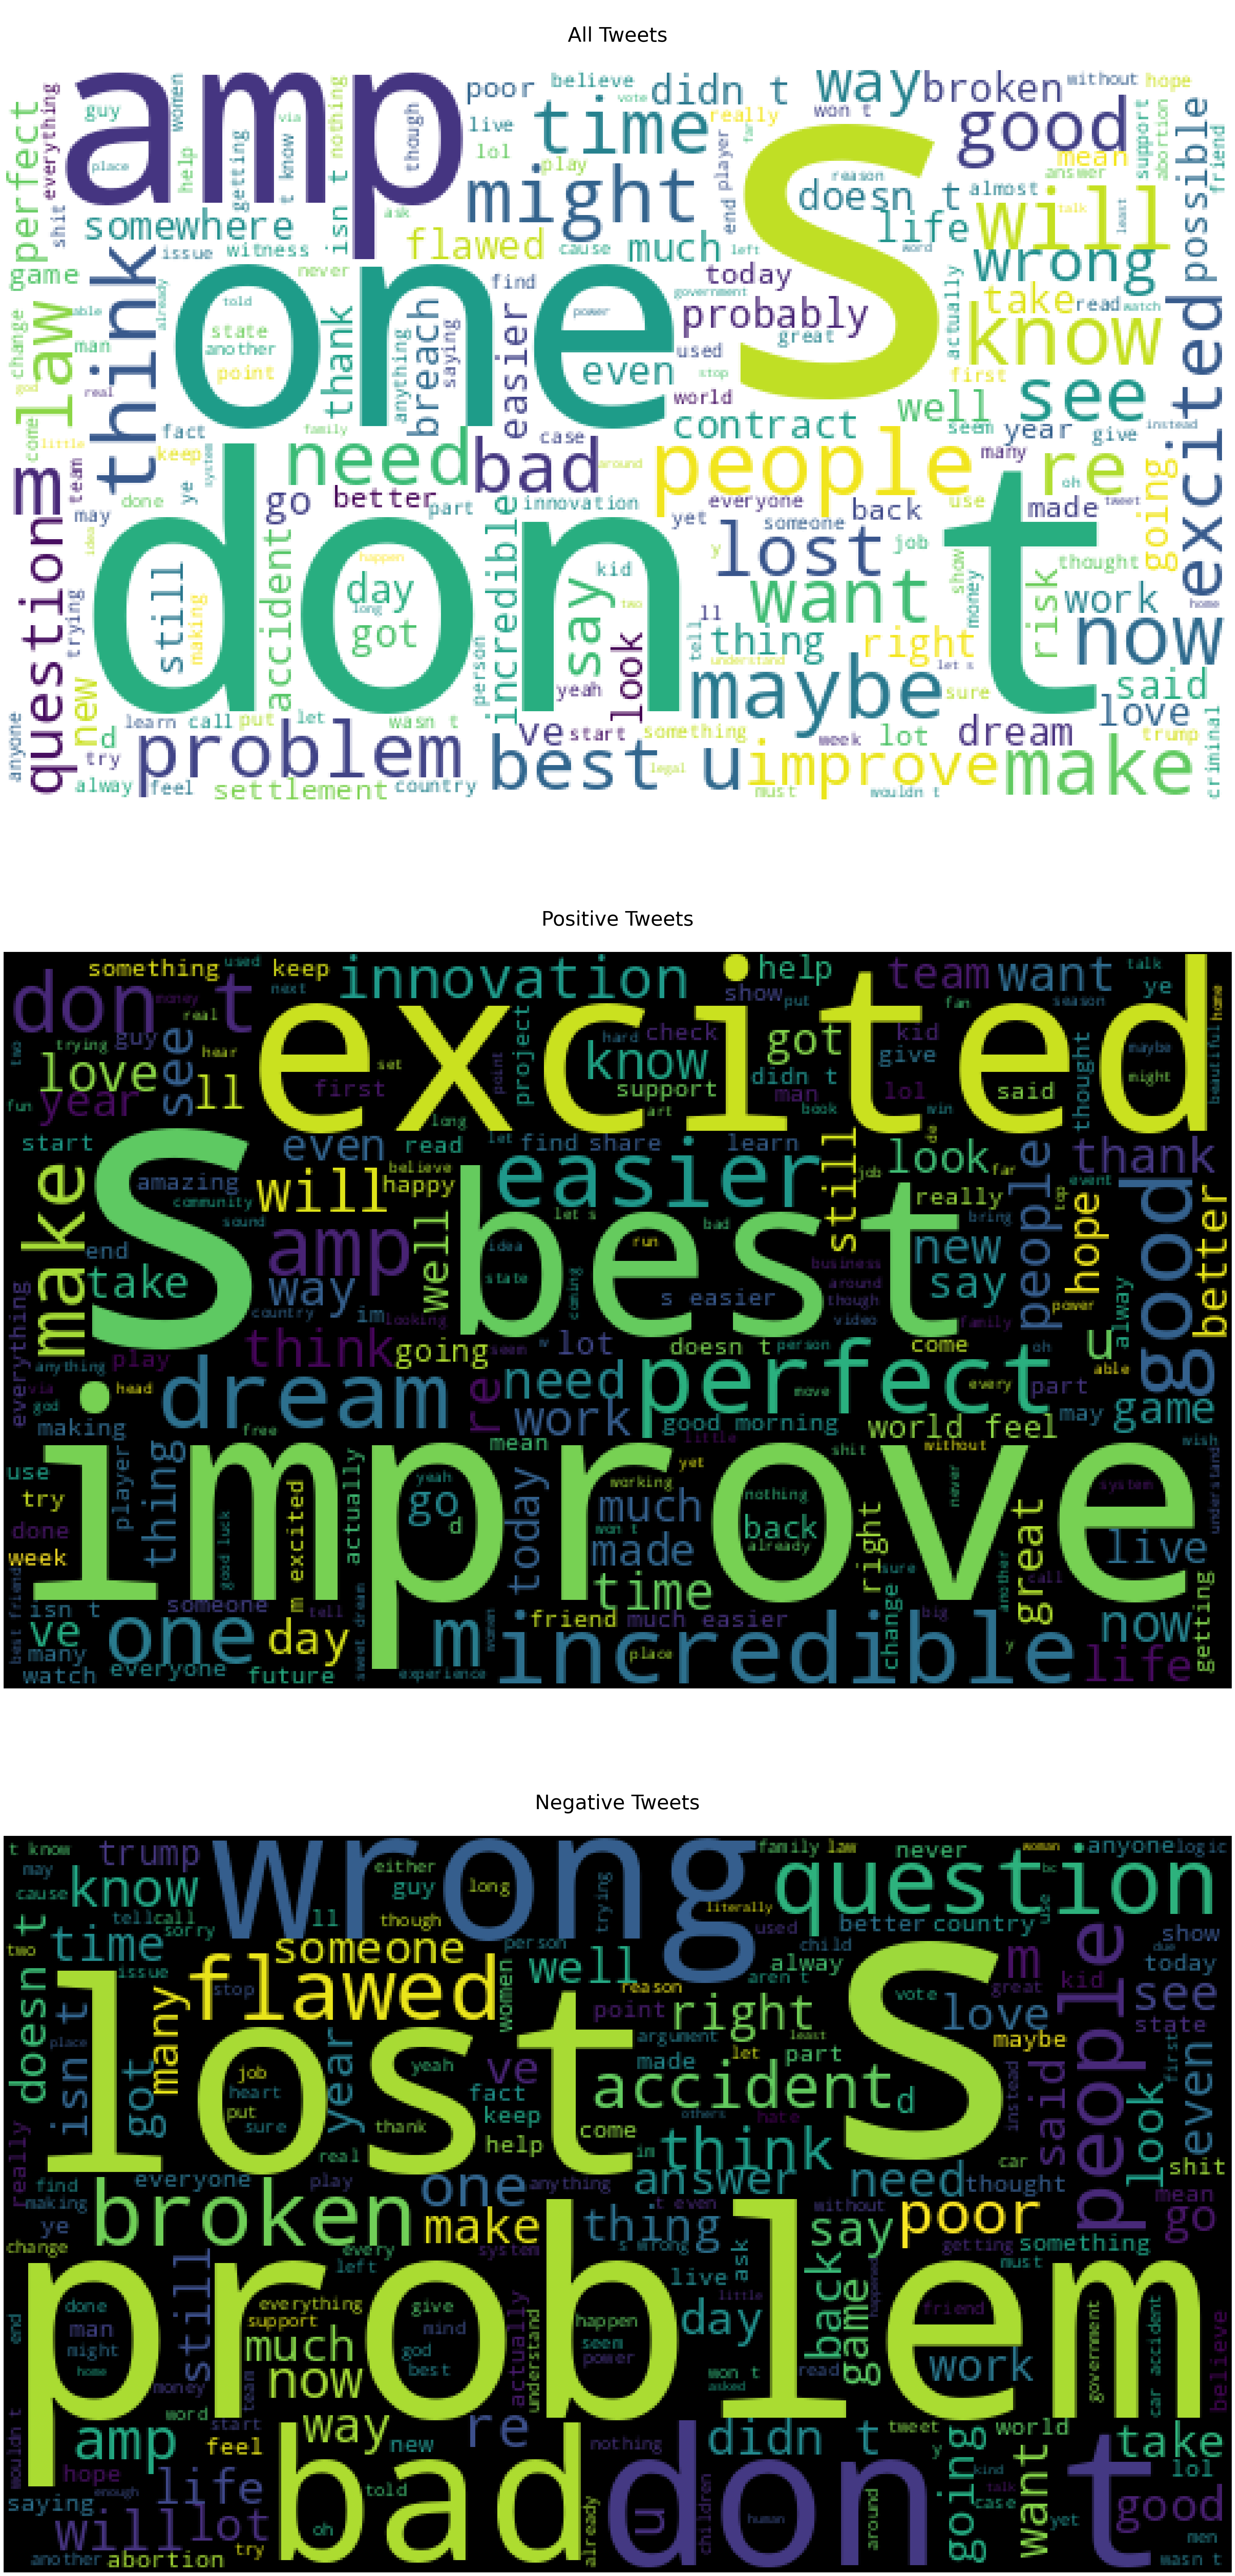

In [7]:
fig, ax = plt.subplots(3, 1, figsize = (90, 90))
firstcloud_all = WordCloud(background_color = 'white', width = 500, height = 300).generate(" ".join(df['Clean']))
firstcloud_positive = WordCloud(background_color = 'black', width = 500, height = 300).generate(" ".join(df[df['Label'] == 'positive']['Clean']))
firstcloud_negative = WordCloud(background_color = 'black', width = 500, height = 300).generate(" ".join(df[df['Label'] == 'negative']['Clean']))

ax[0].imshow(firstcloud_all)
ax[0].set_title('\nAll Tweets\n', fontsize = 40)
ax[0].axis('off')

ax[1].imshow(firstcloud_positive)
ax[1].set_title('\nPositive Tweets\n', fontsize = 40)
ax[1].axis('off')

ax[2].imshow(firstcloud_negative)
ax[2].set_title('\nNegative Tweets\n', fontsize = 40)
ax[2].axis('off')

In [8]:
x = df['Clean']
y = df['Label']

#***Vectorization and Logistic Regression***

In [9]:
model = Pipeline((("vect", TfidfVectorizer()), ("clc", LogisticRegression(max_iter = 600))))
xTrain = x.head(int(50000 * 0.9))
xTest = x.head(int(50000 * 0.1))
yTrain = y.head(int(50000 * 0.9))
yTest = y.head(int(50000 * 0.1))
model.fit(xTrain, yTrain)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clc', LogisticRegression(max_iter=600))])

In [10]:
accuracy = (acc(model.predict(xTest), yTest))
print("Accuracy :- ", accuracy)
yPrediction = model.predict(xTest)

Accuracy :-  0.9776


In [11]:
print(model.predict(['You have a bad habbit of eating']))

['negative']
